## Ziel der Einheit
<p>Veranschaulichung der Verbindung zwischen 1D Signal und DFT-Magnitude.</p>
<p>Rechnen mit Frequenz</p>
<p>Experimentieren mit Sounddaten</p>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
number_of_chunks=2000
maxread=50000

## Sounddatei laden

In [13]:
def extract_sample_value_list_from_file(str_file_name):
    noise_gate=32768/10;
    with open(str_file_name,'rb') as f:
        # Read in bytes
        f.seek(0,2)
        size=min(f.tell(),maxread)
        f.seek(0)
        bArray=f.read(size)

        # Configure start and end
        start=44
        end=len(bArray)
        for i in range (44,len(bArray)-4,4):
            if(abs(int.from_bytes(bArray[i:i+2],byteorder='little',signed=True))>=noise_gate):
                start=i;
                break;
        for i in range (len(bArray)-4,start,-4):
            if(abs(int.from_bytes(bArray[i:i+2],byteorder='little',signed=True))>=noise_gate):
                end=i;
                break;
      
        # Read chunks
        if (end-start>=number_of_chunks*4):
            middle=(start+end)//2
            start=middle-number_of_chunks*2
            end=middle+number_of_chunks*2
            

        # Output chunks
        mid=[]
        for i in range(start,end,4):
            leftValue=int.from_bytes(bArray[i:i+2],byteorder='little',signed=True)
            rightValue=int.from_bytes(bArray[i+2:i+4],byteorder='little',signed=True)
            mid.append((leftValue+rightValue)/2**15)
        return mid

## Signal darstellen

In [14]:
def displaySignal(wave_size, test):
    stringAll=""
    minVal=min(test)
    maxVal=max(test)
    d=maxVal-minVal
    for i in range (0,len(test),1):
        if(i<10):
            s="000"+str(i)+"::"
        elif(i<100):
            s="00"+str(i)+"::"
        elif(i<1000):
            s="0"+str(i)+"::"
        else:
            s=""+str(i)+"::"
        s+='|'
        midVal=test[i]
        for j in range(int(minVal*wave_size/d),int(test[i]*wave_size/d),1):
            s+='|'
        stringAll=stringAll+s+"\n"
    return stringAll


## Dateiname: "Sounds\\\\NNN(S).wav"
<h6>NNN: verfügbare Noten: C3\_, D3\_, E3\_, F3\_, G3\_, A3\_, B3\_, C4\_, D4\_, E4\_, F4\_, G4\_, A4\_, B4\_</h6>
<h6>S: verfügbare Signalarten: sawtooth, sine, square, triangle, pulse1, pulse2, synth5, synth10</h6>

In [60]:
fileName="Sounds/A3_(sine).wav"

## Form und Wellenform des Sounds

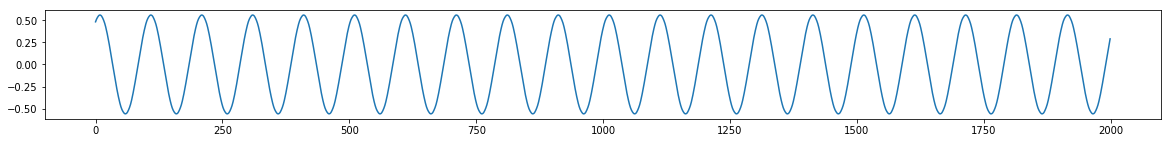

In [61]:
values=extract_sample_value_list_from_file(fileName)
plt.figure(figsize=(20.0, 2.0))
plt.plot(values)
plt.show()
#print("==============================\n")
#print("Signal:\n")
#text=displaySignal(100, values)
#print(text)

## Form des DFT-Magnitude-Signals
<p>Merkmal: die erste Spitze der DFT-Magnitude entspricht die Wiederholungsanzahl der Signalwelle.</p>
<p>Z.B. Das Signal der Note A3 hat 2000 Samples und das DFT-Magnitude-Signal von der Note A3 hat die erste Spitze in Position 20. Das Signal der Note enthält also 20 Mal der Wellenform innerhalbs 2000 Samples.

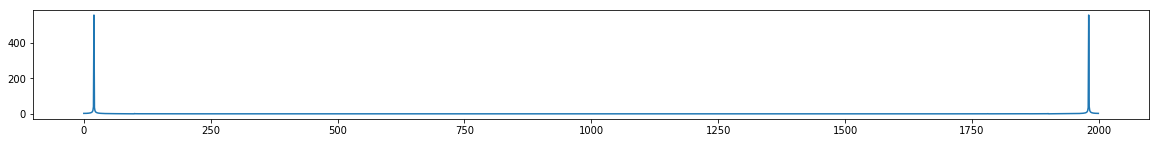



DFT magnitude:

0000::|
0001::|
0002::|
0003::|
0004::|
0005::|
0006::|
0007::|
0008::|
0009::|
0010::|
0011::|
0012::|
0013::||
0014::||
0015::||
0016::||
0017::|||
0018::||||
0019::||||||||
0020::|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
0021::|||||||
0022::||||
0023::|||
0024::||
0025::||
0026::||
0027::|
0028::|
0029::|
0030::|
0031::|
0032::|
0033::|
0034::|
0035::|
0036::|
0037::|
0038::|
0039::|
0040::|
0041::|
0042::|
0043::|
0044::|
0045::|
0046::|
0047::|
0048::|
0049::|
0050::|
0051::|
0052::|
0053::|
0054::|
0055::|
0056::|
0057::|
0058::|
0059::|
0060::|
0061::|
0062::|
0063::|
0064::|
0065::|
0066::|
0067::|
0068::|
0069::|
0070::|
0071::|
0072::|
0073::|
0074::|
0075::|
0076::|
0077::|
0078::|
0079::|
0080::|
0081::|
0082::|
0083::|
0084::|
0085::|
0086::|
0087::|
0088::|
0089::|
0090::|
0091::|
0092::|
0093::|
0094::|
0095::|
0096::|
0097::|
0098::|
0099::|
0100::|
0101::|
0102::|
0103::|
0104::|
0105::|
0106

In [62]:
dftValues=np.fft.fft(values)
dftMagnitudes=abs(dftValues)
plt.figure(figsize=(20.0, 2.0))
plt.plot(dftMagnitudes)
plt.show()
print("\n===============================\n")
print("DFT magnitude:\n")
text=displaySignal(100, dftMagnitudes)
print(text)

## Aufgabe
<h1>a. Tonhöhe und Frequenz</h1> 
<p>Sounddateien wurden mit Stereo-Sampling-Rate 44100Hz aufgenommen (Mono-Sampling-Rate: 22050Hz). Das heißt, in einer Sekunde nimmt das Aufnahmegerät 44100 Samples auf (22050 Samples aus jedem Kanal.) </p>
<p>Schätzen Sie die Frequenzen der Noten A3, C4 und E4 mittels der Dateien "Sounds/XX_(sine).wav" und der Anzahl der Samples von 2000.</p>

<h1>b. Wellenformen und Frequenzkomponente</h1>
Laden Sie die Sounddateien der unterschiedlichen Wellenformen (sawtooth, sine, square, triangle, pulse1, pulse2, synth5, synth10) und betrachten Sie das DFT-Magnitude-Signal. Viel Spaß damit! :-)
<h6>A4</h6>
<p>
<audio controls
  <source src="Sounds/A4_(sawtooth).wav" type="audio/wave">
</audio>
SAWTOOTH
</p>
<p>
<audio controls
  <source src="Sounds/A4_(sine).wav" type="audio/wave">
</audio>
SINE
</p>
<p>
<audio controls
  <source src="Sounds/A4_(square).wav" type="audio/wave">
</audio>
SQUARE
</p>
<p>
<audio controls
  <source src="Sounds/A4_(triangle).wav" type="audio/wave">
</audio>
TRIANGLE
</p>
<p>
<audio controls
  <source src="Sounds/A4_(pulse1).wav" type="audio/wave">
</audio>
PULSE1
</p>
<p>
<audio controls
  <source src="Sounds/A4_(pulse2).wav" type="audio/wave">
</audio>
PULSE2
</p>
<p>
<audio controls
  <source src="Sounds/A4_(synth5).wav" type="audio/wave">
</audio>
SYNTH5
</p>
<p>
<audio controls
  <source src="Sounds/A4_(synth10).wav" type="audio/wave">
</audio>
SYNTH10
</p>